In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import os

from pydataset import data

###Data Acquisition

#1
In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

print the first 3 rows
print the number of rows and columns (shape)
print the column names
print the data type of each column
print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [4]:
#1
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
#1
df_iris.shape

(150, 5)

In [6]:
#1
df_iris.columns

# or create a list
# df_iris.tolist()

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
#1
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [8]:
#1
stats = df_iris.describe().T
# .T transcribes the df so that we can call the columns that we want
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
#1
stats['range'] = stats['max'] - stats['min']
stats
# I don't think rescaling is necessary because the different rows and columns
# are in a similar range

,count,mean,std,min,25%,50%,75%,max,range
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


#2
Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

assign the first 100 rows to a new dataframe, df_excel_sample
print the number of rows of your original dataframe
print the first 5 column names
print the column names that have a data type of object
compute the range for each of the numeric variables.

In [10]:
#2
df_telco = pd.read_excel('Spreadsheets_Exercises.xlsx')
df_telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


In [11]:
#2
# convert these columns to boolean
df_telco.partner = df_telco.partner == 'Yes'
df_telco.dependents = df_telco.dependents == 'Yes'
df_telco.churn = df_telco.churn == 'Yes'
df_telco.is_senior_citizen = df_telco.is_senior_citizen == 1

df_telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,False,True,True,1,1,1,Mailed check,65.6,593.30,False,NaN,NaN
1,0003-MKNFE,Male,False,False,False,2,1,0,Mailed check,59.9,542.40,False,NaN,NaN
2,0004-TLHLJ,Male,False,False,False,1,2,0,Electronic check,73.9,280.85,True,NaN,NaN
3,0011-IGKFF,Male,True,True,False,1,2,0,Electronic check,98.0,1237.85,True,NaN,NaN
4,0013-EXCHZ,Female,True,True,False,1,2,0,Mailed check,83.9,267.40,True,NaN,NaN


In [12]:
#2
df_telco_sample = df_telco.head(100)

In [13]:
#2
df_telco.shape[0]

7049

In [14]:
#2
df_telco.columns[0:5].to_list()

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [15]:
#2
df_telco.select_dtypes(include='object').columns.to_list()

['customer_id', 'gender', 'payment_type']

In [16]:
#2
stats = df_telco.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#2
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#2
# alternative method to get the range
num = df_telco.select_dtypes(include = ['float64', 'int64'])
num.max() - num.min()

phone_service          2.0
internet_service       2.0
contract_type          2.0
monthly_charges      100.5
total_charges       8666.0
Unnamed: 12            NaN
Unnamed: 13            NaN
dtype: float64

#3
Read the data from this google sheet into a dataframe, df_google

print the first 3 rows
print the number of rows and columns
print the column names
print the data type of each column
print the summary statistics for each of the numeric variables
print the unique values for each of your categorical variables

In [19]:
#3
# assign a variable name to the url
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [20]:
#3
# modify the google sheet share url to become a csv export url
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

# convert csv to dataframe
df_google = pd.read_csv(csv_export_url)

df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
#3
df_google.shape

(891, 12)

In [22]:
#3
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [23]:
#3
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
#3
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [25]:
#3
for column in df_google.select_dtypes(include='object').columns:
    print(f'values in {column} column:')
    print(df_google[column].value_counts())
    print('..........')
    
   

values in Name column:
Coelho, Mr. Domingos Fernandeo                  1
Young, Miss. Marie Grice                        1
O'Leary, Miss. Hanora "Norah"                   1
Reeves, Mr. David                               1
Christy, Miss. Julie Rachel                     1
                                               ..
Bracken, Mr. James H                            1
Partner, Mr. Austen                             1
Novel, Mr. Mansouer                             1
Mernagh, Mr. Robert                             1
Jerwan, Mrs. Amin S (Marie Marthe Thuillard)    1
Name: Name, Length: 891, dtype: int64
..........
values in Sex column:
male      577
female    314
Name: Sex, dtype: int64
..........
values in Ticket column:
CA. 2343    7
1601        7
347082      7
CA 2144     6
347088      6
           ..
347067      1
239856      1
113028      1
220367      1
371060      1
Name: Ticket, Length: 681, dtype: int64
..........
values in Cabin column:
C23 C25 C27        4
B96 B98           

In [26]:
#import acquire
from acquire import get_titanic_data
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [27]:
from acquire import get_iris_data
get_iris_data()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


###Data Preparation

In [28]:
#1
iris_df = get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [29]:
#2
iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [30]:
#3
iris_df = iris_df.rename(columns= {'species_name':'species'})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
#4
iris_df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [32]:
#4
dummy_df= pd.get_dummies(iris_df['species'], dummy_na = False, drop_first=False)
dummy_df

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [33]:
#4
iris_df= pd.concat([iris_df, dummy_df], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [99]:
#5
def prepare_iris(df):
    iris_df = df.drop(columns = ['species_id', 'measurement_id'])
    iris_df = iris_df.rename(columns= {'species_name':'species'})
    #dummy_df= pd.get_dummies(iris_df['species'], dummy_na = False, drop_first=False)
    #iris_df= pd.concat([iris_df, dummy_df], axis=1)
    train, test = train_test_split(iris_df, test_size=0.2, random_state=1349, stratify=iris_df.species)
    train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)
    return train, validate, test

In [63]:
iris_df = get_iris_data()
train, validate, test = prep_iris(iris_df)

In [64]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


In [65]:
validate.head()

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
28,5.2,3.4,1.4,0.2,setosa
33,5.5,4.2,1.4,0.2,setosa
46,5.1,3.8,1.6,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica


In [66]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
17,5.1,3.5,1.4,0.3,setosa
31,5.4,3.4,1.5,0.4,setosa
114,5.8,2.8,5.1,2.4,virginica


###Exploratory Analysis

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [100]:
# Acquire, prepare & split your data.
iris_df = get_iris_data()
train, validate, test = prepare_iris(iris_df)

In [101]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [102]:
# For each measurement type (quantitative variable): create a histogram, 
# boxplot, & compute descriptive statistics (using .describe()).

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


In [103]:
train.sepal_length.describe()

count    84.000000
mean      5.847619
std       0.841324
min       4.300000
25%       5.075000
50%       5.900000
75%       6.425000
max       7.700000
Name: sepal_length, dtype: float64

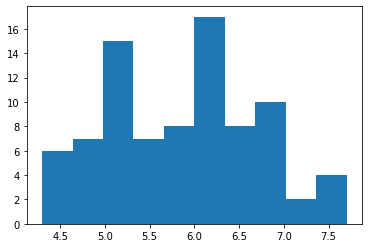

In [104]:
train.sepal_length.hist().grid(False)

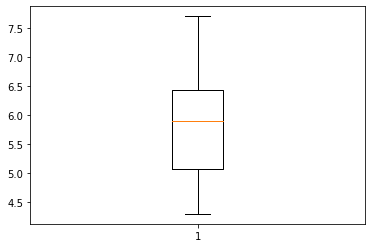

In [105]:
plt.boxplot(train.sepal_length)
plt.show()

In [106]:
train.sepal_width.describe()

count    84.000000
mean      3.053571
std       0.417233
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64

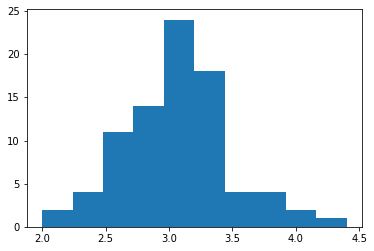

In [107]:
train.sepal_width.hist().grid(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3ddf7f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3ddf7fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3ddf7f070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3ddf8b190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3ddf8b4f0>],
 'means': []}

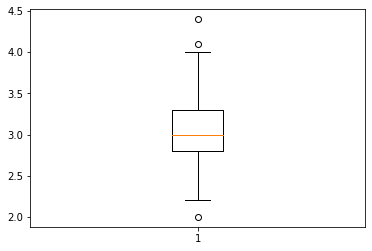

In [108]:
plt.boxplot(train.sepal_width)

In [109]:
train.petal_length.describe()

count    84.000000
mean      3.738095
std       1.765459
min       1.000000
25%       1.600000
50%       4.300000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

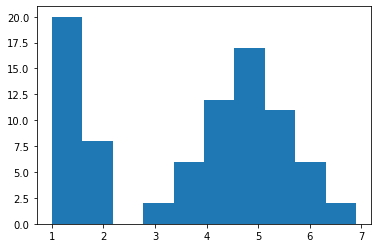

In [110]:
train.petal_length.hist().grid(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3de964370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3de964a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3de8fbfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3de971130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3de971490>],
 'means': []}

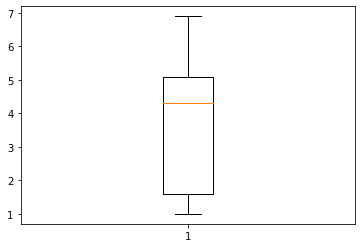

In [111]:
plt.boxplot(train.petal_length)

In [112]:
train.petal_width.describe()

count    84.000000
mean      1.208333
std       0.775717
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

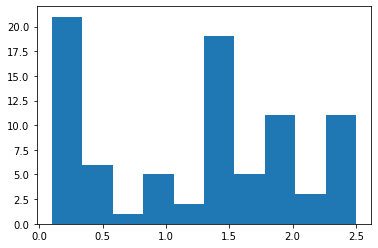

In [113]:
train.petal_width.hist().grid(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3dea67c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3dea67280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3dea463a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3deaa2610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3deaa2f40>],
 'means': []}

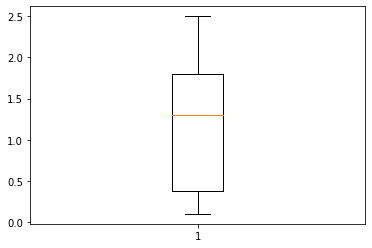

In [114]:
plt.boxplot(train.petal_width)

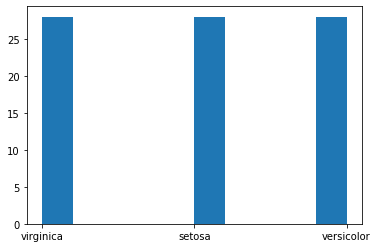

In [115]:
# For each species (categorical variable): create a frequency table and a bar plot 
# of those frequencies.
train.species.hist().grid(False)

In [116]:
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

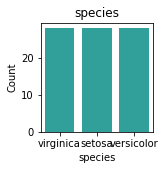

               species  Count  Percent
versicolor   virginica     28    33.33
setosa          setosa     28    33.33
virginica   versicolor     28    33.33
_________________________________________________________________


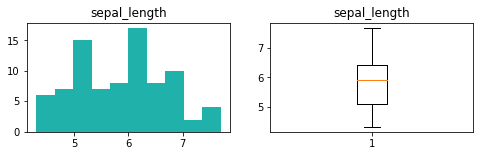

count    84.000000
mean      5.847619
std       0.841324
min       4.300000
25%       5.075000
50%       5.900000
75%       6.425000
max       7.700000
Name: sepal_length, dtype: float64


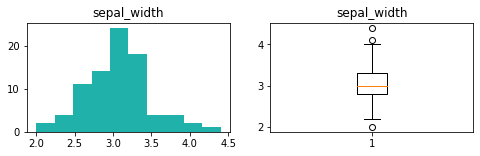

count    84.000000
mean      3.053571
std       0.417233
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64


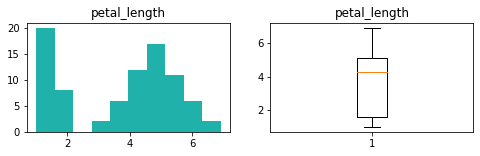

count    84.000000
mean      3.738095
std       1.765459
min       1.000000
25%       1.600000
50%       4.300000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


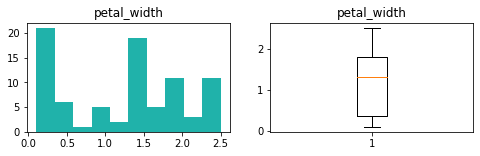

count    84.000000
mean      1.208333
std       0.775717
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [118]:
# this is using the pre-defined explore function written by Codeup staff
import explore

cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
explore.explore_univariate(train, cat_vars, quant_vars)

Takeaways
The univariate sepal width may have a normal distribution, but the other parameters appear to have several different distributions smushed together

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

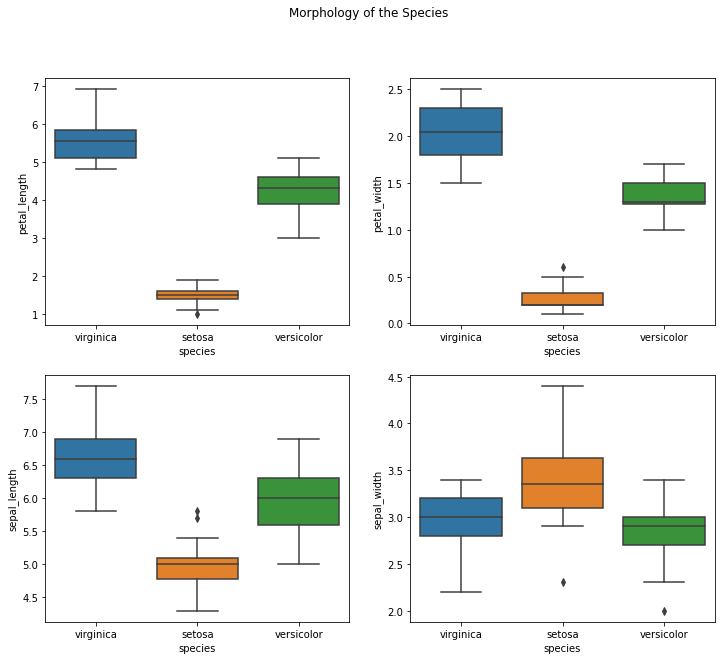

In [84]:
plt.figure(figsize=(12, 10))
plt.suptitle('Morphology of the Species')
plt.subplot(221)
sns.boxplot(data=train, y='petal_length', x='species')
plt.subplot(222)
sns.boxplot(data=train, y='petal_width', x='species')
plt.subplot(223)
sns.boxplot(data=train, y='sepal_length', x='species')
plt.subplot(224)
sns.boxplot(data=train, y='sepal_width', x='species')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


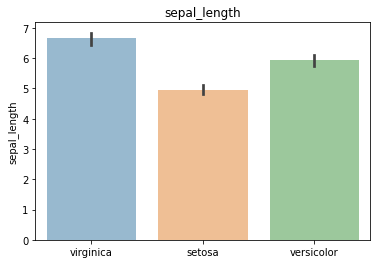

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


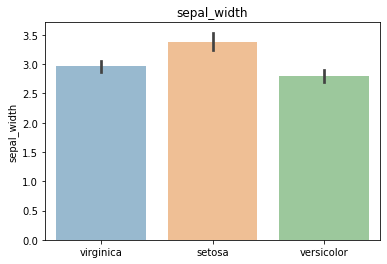

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


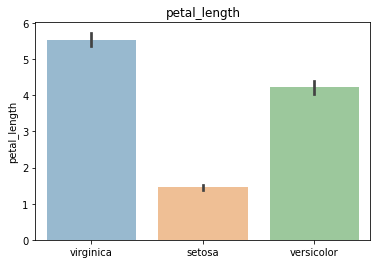

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


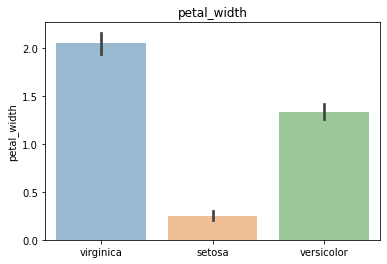

In [85]:
# alternative method of plotting using a loop
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(0,4):
    sns.barplot('species', features[i], data=train, alpha=0.5)
    plt.xlabel('')
    plt.ylabel(features[i])
    plt.title(features[i])
    plt.show()

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots.
For each measurement type, compute the descriptive statistics for each species.

In [119]:
# now using explore function given by Codeup staff
# need to change to dummy variables first to use the function

from prepare import prep_data
from sklearn.model_selection import train_test_split

df, dummy_df = prep_data(iris_df)
dummy_df.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [120]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
df.replace({'species':{'setosa': 0, 'virginica': 1, 'versicolor': 2}}, inplace=True)

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    # train_validate is 80% of the original dataset; is both train and validate data
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    # now we are splitting the train_validate into train and validate
    # validate is 30% when we split this data
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

df_train, df_val, df_test = train_validate_test_split(df, target='species')

In [122]:
df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,1
36,5.5,3.5,1.3,0.2,0
83,6.0,2.7,5.1,1.6,2
145,6.7,3.0,5.2,2.3,1
18,5.7,3.8,1.7,0.3,0


species 
_____________________

    chi2       p-value  degrees of freedom
0  168.0  2.809846e-35                   4

observed:
 species   0   1   2  All
species                 
0        28   0   0   28
1         0  28   0   28
2         0   0  28   28
All      28  28  28   84

expected:
           0         1         2
0  9.333333  9.333333  9.333333
1  9.333333  9.333333  9.333333
2  9.333333  9.333333  9.333333


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


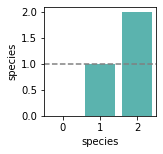


_____________________

sepal_length 
____________________



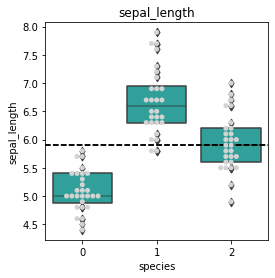

         count      mean       std  min    25%  50%   75%  max
species                                                       
0         28.0  5.089286  0.360390  4.4  4.875  5.0  5.40  5.8
1         28.0  6.682143  0.579945  5.8  6.300  6.6  6.95  7.9
2         28.0  5.942857  0.490222  4.9  5.600  5.9  6.20  7.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1.0, pvalue=1.4434777280665842e-10)

____________________

sepal_width 
____________________



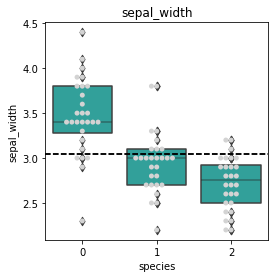

         count      mean       std  min    25%   50%    75%  max
species                                                         
0         28.0  3.467857  0.427788  2.3  3.275  3.40  3.800  4.4
1         28.0  2.953571  0.345856  2.2  2.700  3.00  3.100  3.8
2         28.0  2.721429  0.292318  2.2  2.500  2.75  2.925  3.2 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=663.0, pvalue=8.272661237791779e-06)

____________________

petal_length 
____________________



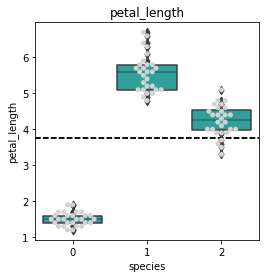

         count      mean       std  min    25%   50%    75%  max
species                                                         
0         28.0  1.507143  0.184448  1.2  1.400  1.50  1.600  1.9
1         28.0  5.571429  0.513418  4.8  5.100  5.60  5.800  6.7
2         28.0  4.232143  0.431237  3.3  3.975  4.25  4.525  5.1 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=1.2865461324644214e-10)

____________________

petal_width 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


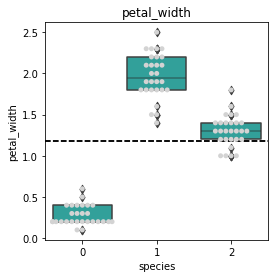

         count      mean       std  min  25%   50%  75%  max
species                                                     
0         28.0  0.275000  0.120570  0.1  0.2  0.20  0.4  0.6
1         28.0  1.967857  0.274946  1.4  1.8  1.95  2.2  2.5
2         28.0  1.303571  0.189506  1.0  1.2  1.30  1.4  1.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=9.227797843961986e-11)

____________________



In [123]:
explore.explore_bivariate(df_train, 'species', cat_vars, quant_vars)

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

species 
_____________________

        chi2       p-value  degrees of freedom
0  52.071429  5.351800e-13                   1

observed:
 species   1   2  All
species             
1        28   0   28
2         0  28   28
All      28  28   56

expected:
       0     1
0  14.0  14.0
1  14.0  14.0


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


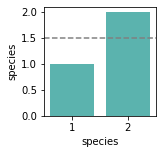


_____________________

sepal_length 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


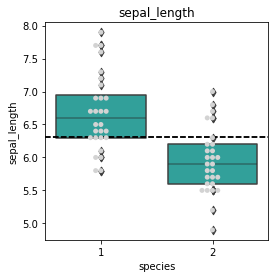

/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


         count      mean       std  min  25%  50%   75%  max
species                                                     
1         28.0  6.682143  0.579945  5.8  6.3  6.6  6.95  7.9
2         28.0  5.942857  0.490222  4.9  5.6  5.9  6.20  7.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

sepal_width 
____________________



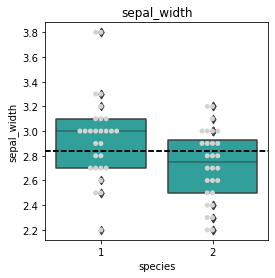

         count      mean       std  min  25%   50%    75%  max
species                                                       
1         28.0  2.953571  0.345856  2.2  2.7  3.00  3.100  3.8
2         28.0  2.721429  0.292318  2.2  2.5  2.75  2.925  3.2 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_length 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


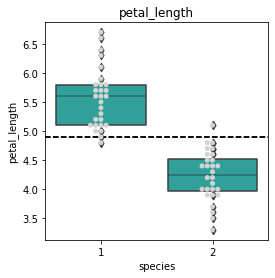

         count      mean       std  min    25%   50%    75%  max
species                                                         
1         28.0  5.571429  0.513418  4.8  5.100  5.60  5.800  6.7
2         28.0  4.232143  0.431237  3.3  3.975  4.25  4.525  5.1 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_width 
____________________



/usr/local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


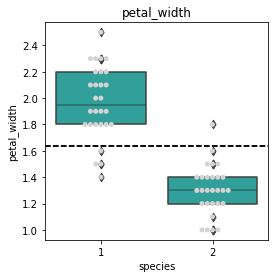

         count      mean       std  min  25%   50%  75%  max
species                                                     
1         28.0  1.967857  0.274946  1.4  1.8  1.95  2.2  2.5
2         28.0  1.303571  0.189506  1.0  1.2  1.30  1.4  1.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [124]:
# ignore 'setosa' or 0 results for species with the !=
explore.explore_bivariate(df_train[(df_train.species != 0)], 'species', cat_vars, quant_vars)

Takeaways:
Petal length and width seem like they could possibly be good predictors of the iris species.
Not including sepal length and width could possibly speed things up if there were more observations, due to not as significant variations.

Multivariate Stats
Visualize the interaction of each measurement type with the others.

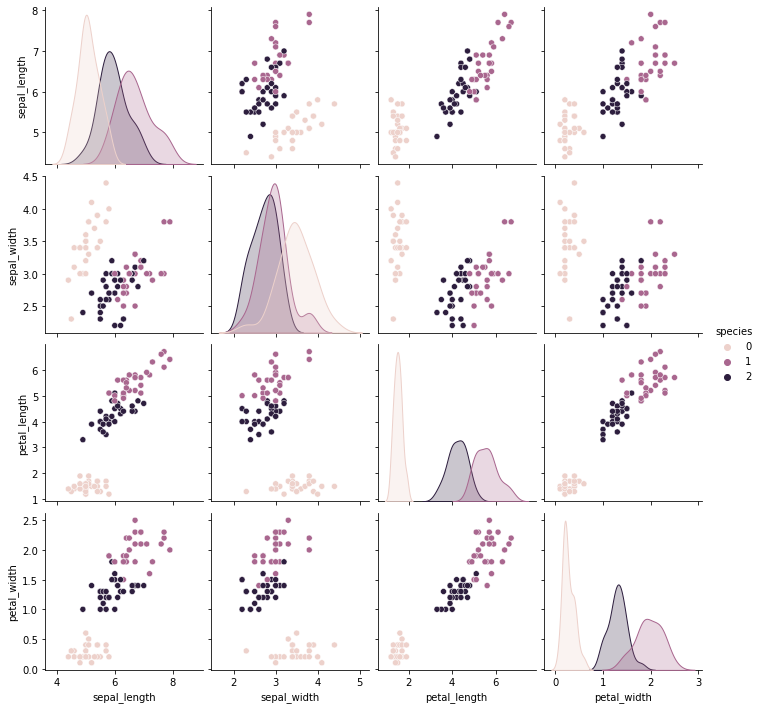

In [125]:
# plots each possible of features, while using a different color for each species
sns.pairplot(data=df_train, hue='species')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

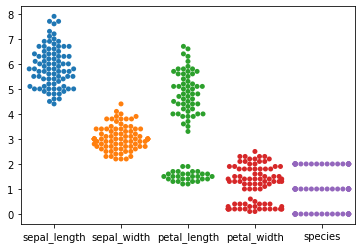

In [126]:
sns.swarmplot(data=df_train)

In [127]:
melted = df_train.melt(id_vars='species')
melted

,species,variable,value
0,1,sepal_length,7.2
1,0,sepal_length,5.5
2,2,sepal_length,6.0
3,1,sepal_length,6.7
4,0,sepal_length,5.7
...,...,...,...
331,0,petal_width,0.2
332,1,petal_width,2.3
333,1,petal_width,2.1
334,0,petal_width,0.4


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='variable', ylabel='value'>

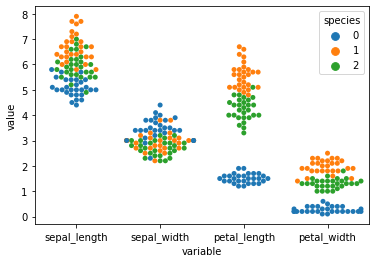

In [128]:
sns.swarmplot(x='variable', y='value', data=melted, hue='species')

For virginica & setosa: Compare the sepal area using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups.

HO: mean sepal area virginica == mean sepal area setosa
Ha: mean sepal area virginica != mean sepal area setosa

In [129]:
from scipy.stats import mannwhitneyu
df_train['sepal_area'] = df_train.sepal_length * df_train.sepal_width
df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
129,7.2,3.0,5.8,1.6,1,21.60
36,5.5,3.5,1.3,0.2,0,19.25
83,6.0,2.7,5.1,1.6,2,16.20
145,6.7,3.0,5.2,2.3,1,20.10
18,5.7,3.8,1.7,0.3,0,21.66


In [130]:
x = df_train[df_train.species == 1].sepal_area
y = df_train[df_train.species == 0].sepal_area
alpha = 0.05

mannwhitneyu(x=x, y=y)

MannwhitneyuResult(statistic=261.5, pvalue=0.01655736531650055)

We reject the null hypothesis.